<h1><center><strong>PROYECTO INDIVIDUAL #2</strong></center></h1>

<h2 style="color:pink"><center><strong>Cryptocurrency Market Data Analytics (1 FASE)</strong></h2>

El presente proyecto tiene como finalidad orientar al cliente respecto del comportamiento de las criptomonedas seleccionadas para el presente análisis, permitiendo así el tomar decisiones oportunas para la inversión y crecimiento del negocio. Pues no es un secreto que el mundo ha cambiado y cada vez es más común el escuchar a clientes, compañeros u empresas haciendo presencia en este universo de las criptomonedas, una tendencia que llegó para quedarse.

Extrayendo los datos de API coinmarketcap

In [2]:
#importando las librerias necesarias para trabajar con la información
from pycoingecko import CoinGeckoAPI
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#instanciando la funcion 
funcion = CoinGeckoAPI()


In [4]:
#definiendo la fecha inicial y final en formato Unix, para ingresar a la api
fecha_ini = datetime.strptime('2020/08/18', '%Y/%m/%d').timestamp()
fecha_fin = datetime.strptime('2023/08/18', '%Y/%m/%d').timestamp()
print(f'Fecha de inicio: {fecha_ini} \nFecha de fin: {fecha_fin}')

Fecha de inicio: 1597726800.0 
Fecha de fin: 1692334800.0


In [5]:
#Definiendo la función para extraer los datos de la api

def historial(id_moneda=str, vs_moneda=str, desde_fecha=str, hasta_fecha=str, precision=str):
    
    dicc_monedas = funcion.get_coin_market_chart_range_by_id(id = id_moneda, 
                                                        vs_currency = vs_moneda, 
                                                        from_timestamp = desde_fecha, 
                                                        to_timestamp = hasta_fecha,
                                                        precision = precision)

    df_monedas= pd.DataFrame.from_dict(dicc_monedas)

    df_monedas['fecha'] = df_monedas['prices'].apply( lambda x: datetime.fromtimestamp(x[0]//1000).date() )
    df_monedas['prices'] = df_monedas['prices'].apply( lambda x: x[1] )
    df_monedas['market_caps'] = df_monedas['market_caps'].apply( lambda x: x[1] )
    df_monedas['total_volumes'] = df_monedas['total_volumes'].apply( lambda x: x[1] )

    df_monedas = df_monedas.reindex(columns=['fecha', 'prices', 'market_caps', 'total_volumes'])

    return df_monedas

In [6]:
#Probando la función
historial(id_moneda='bitcoin', vs_moneda='usd', desde_fecha=fecha_ini, hasta_fecha=fecha_fin, precision='2')

,fecha,prices,market_caps,total_volumes
0,2020-08-18,11949.61,2.209801e+11,2.482572e+10
1,2020-08-19,11733.28,2.166603e+11,2.338420e+10
2,2020-08-20,11861.84,2.190450e+11,2.035335e+10
3,2020-08-21,11515.12,2.128967e+11,2.340635e+10
4,2020-08-22,11676.39,2.156416e+11,1.957278e+10
...,...,...,...,...
1090,2023-08-13,29284.97,5.696871e+11,4.755220e+09
1091,2023-08-14,29400.59,5.722427e+11,1.240836e+10
1092,2023-08-15,29170.49,5.674983e+11,1.152340e+10
1093,2023-08-16,28754.20,5.599826e+11,1.480998e+10


Para llevar a cabo el análisis a continuación se seleccionaron las siguientes criptomonedas: 'bitcoin','ethereum','binancecoin','cardano','dogecoin','solana','polkadot','matic-network','litecoin','ripple'; por ser las más destacadas en páginas para hacer trading u multiples transaccciones con estas, como https://www.plus500.com/es/Trading/CryptoCurrencies  y https://www.businessinsider.es/cripto/criptomonedas-con-mas-potencial , además de validar en la página de Coingecko el ranking en el cuál se encuentran las mismas actualmente

![Alt text](image.png)

![Alt text](image-1.png) BussinesInsider

![Alt text](image-2.png)

In [7]:
#lista con las cryptomonedas a analizar
lista_monedas = [ 'bitcoin','ethereum','binancecoin','cardano','dogecoin','solana','polkadot','matic-network','litecoin','ripple'
                 ]

In [8]:
#generando el dataframe a utilizar
df = pd.DataFrame()
df_total = pd.DataFrame()

for i in range(len(lista_monedas)):
    df = historial(id_moneda= lista_monedas[i], vs_moneda='usd', desde_fecha=fecha_ini, hasta_fecha=fecha_fin, precision='2')
    df = df.rename(columns={'prices':f'prices {lista_monedas[i]}',
                                   'market_caps':f'market_caps {lista_monedas[i]}',
                                   'total_volumes':f'total_volumes {lista_monedas[i]}'})
    if df_total.shape[0] != 0:
        df_total = pd.merge(df_total, df, how='left' , on='fecha')
    else:
        df_total = df
df_total.head()

,fecha,prices bitcoin,market_caps bitcoin,total_volumes bitcoin,prices ethereum,market_caps ethereum,total_volumes ethereum,prices binancecoin,market_caps binancecoin,total_volumes binancecoin,...,total_volumes polkadot,prices matic-network,market_caps matic-network,total_volumes matic-network,prices litecoin,market_caps litecoin,total_volumes litecoin,prices ripple,market_caps ripple,total_volumes ripple
0,2020-08-18,11949.61,2.209801e+11,2.482572e+10,422.11,4.740090e+10,1.206300e+10,22.97,3.397691e+09,2.714106e+08,...,8.241398e+07,0.03,1.011091e+08,3.330589e+07,65.44,4.278578e+09,3.663784e+09,0.30,1.361654e+10,2.727046e+09
1,2020-08-19,11733.28,2.166603e+11,2.338420e+10,406.57,4.564276e+10,1.285473e+10,22.31,3.302382e+09,2.409817e+08,...,8.241398e+07,0.02,9.338782e+07,3.236564e+07,61.98,4.046065e+09,3.275368e+09,0.29,1.303905e+10,2.493336e+09
2,2020-08-20,11861.84,2.190450e+11,2.035335e+10,416.47,4.675474e+10,1.056436e+10,23.07,3.414256e+09,2.533319e+08,...,4.951174e+07,0.03,1.005557e+08,2.215847e+07,62.88,4.108058e+09,2.803148e+09,0.29,1.312109e+10,2.370639e+09
3,2020-08-21,11515.12,2.128967e+11,2.340635e+10,386.82,4.343450e+10,1.251844e+10,22.09,3.260640e+09,2.625821e+08,...,5.123375e+07,0.02,9.417853e+07,3.142784e+07,59.11,3.863364e+09,2.803094e+09,0.28,1.255986e+10,2.286851e+09
4,2020-08-22,11676.39,2.156416e+11,1.957278e+10,395.89,4.445450e+10,1.061298e+10,22.18,3.277781e+09,2.077040e+08,...,4.739210e+08,0.03,9.842178e+07,1.962422e+07,60.32,3.938572e+09,2.344595e+09,0.29,1.282836e+10,2.079081e+09


In [9]:
#obteniendo información del dataframe
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095 entries, 0 to 1094
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fecha                        1095 non-null   object 
 1   prices bitcoin               1095 non-null   float64
 2   market_caps bitcoin          1095 non-null   float64
 3   total_volumes bitcoin        1095 non-null   float64
 4   prices ethereum              1095 non-null   float64
 5   market_caps ethereum         1095 non-null   float64
 6   total_volumes ethereum       1095 non-null   float64
 7   prices binancecoin           1095 non-null   float64
 8   market_caps binancecoin      1095 non-null   float64
 9   total_volumes binancecoin    1095 non-null   float64
 10  prices cardano               1095 non-null   float64
 11  market_caps cardano          1095 non-null   float64
 12  total_volumes cardano        1095 non-null   float64
 13  prices dogecoin   

In [10]:
#Añadiendo el año en otra columna del dataframe
df_total['Year']=df_total['fecha'].astype('datetime64').dt.year


In [46]:
#Generando el archivi .csv 
df_total.to_csv('df_criptomonedas.csv')

<h2 style="color:pink"><center><strong>EDA</strong></h2>

In [11]:
#Obteniendo una descripción o resumen estadísitico de las variables níumericas del dataframe
df_total.describe()

,prices bitcoin,market_caps bitcoin,total_volumes bitcoin,prices ethereum,market_caps ethereum,total_volumes ethereum,prices binancecoin,market_caps binancecoin,total_volumes binancecoin,prices cardano,...,prices matic-network,market_caps matic-network,total_volumes matic-network,prices litecoin,market_caps litecoin,total_volumes litecoin,prices ripple,market_caps ripple,total_volumes ripple,Year
count,1095.000000,1.095000e+03,1.095000e+03,1095.000000,1.095000e+03,1.095000e+03,1095.000000,1.095000e+03,1.095000e+03,1095.000000,...,1095.000000,1.095000e+03,1.095000e+03,1095.000000,1.095000e+03,1.095000e+03,1095.000000,1.095000e+03,1.095000e+03,1095.000000
mean,32604.958950,6.172918e+11,3.233600e+10,2014.850694,2.388427e+11,1.903665e+10,298.157114,4.785961e+10,1.614951e+09,0.801580,...,0.917178,6.783703e+09,7.344975e+08,115.554995,7.947942e+09,2.326231e+09,0.602219,2.883482e+10,3.765379e+09,2021.627397
std,14124.603008,2.638437e+11,1.842901e+10,1035.624441,1.226552e+11,1.455513e+10,151.661510,2.501333e+10,1.882518e+09,0.657067,...,0.603695,4.295864e+09,1.017588e+09,60.479562,3.993756e+09,2.844851e+09,0.307626,1.414801e+10,4.653112e+09,0.949347
min,10125.010000,1.868254e+11,3.882362e+09,321.080000,3.623917e+10,2.179799e+09,19.410000,2.870048e+09,1.776448e+07,0.080000,...,0.010000,5.417965e+07,4.683432e+06,42.970000,2.815597e+09,1.718595e+08,0.210000,9.633436e+09,2.316223e+08,2020.000000
25%,20668.840000,3.953748e+11,2.023326e+10,1323.465000,1.582607e+11,9.671560e+09,242.550000,3.798886e+10,5.251203e+08,0.320000,...,0.540000,4.079336e+09,2.282284e+08,66.155000,4.726048e+09,5.489053e+08,0.380000,1.881396e+10,1.311269e+09,2021.000000
50%,29833.450000,5.724142e+11,2.817049e+10,1828.460000,2.194228e+11,1.520816e+10,302.910000,4.813174e+10,1.077437e+09,0.470000,...,0.890000,7.102463e+09,4.661140e+08,94.890000,6.886301e+09,1.060686e+09,0.490000,2.479237e+10,2.318743e+09,2022.000000
75%,43011.995000,8.118142e+11,3.989328e+10,2697.595000,3.182375e+11,2.320096e+10,385.105000,6.303960e+10,1.866837e+09,1.220000,...,1.325000,9.897998e+09,8.564369e+08,152.065000,1.030672e+10,2.712428e+09,0.780000,3.753692e+10,4.223962e+09,2022.000000
max,67617.020000,1.278798e+12,1.788941e+11,4815.000000,5.716658e+11,1.409065e+11,675.100000,1.104412e+11,2.210352e+10,2.970000,...,2.880000,1.975122e+10,1.086094e+10,384.670000,2.567776e+10,1.835039e+10,1.840000,8.438906e+10,6.246813e+10,2023.000000


In [12]:
#validando valores nulos dentro de cada una de las variables sujetas a estudio
df_total.isnull().any()

fecha                          False
prices bitcoin                 False
market_caps bitcoin            False
total_volumes bitcoin          False
prices ethereum                False
market_caps ethereum           False
total_volumes ethereum         False
prices binancecoin             False
market_caps binancecoin        False
total_volumes binancecoin      False
prices cardano                 False
market_caps cardano            False
total_volumes cardano          False
prices dogecoin                False
market_caps dogecoin           False
total_volumes dogecoin         False
prices solana                  False
market_caps solana             False
total_volumes solana           False
prices polkadot                False
market_caps polkadot           False
total_volumes polkadot         False
prices matic-network           False
market_caps matic-network      False
total_volumes matic-network    False
prices litecoin                False
market_caps litecoin           False
t

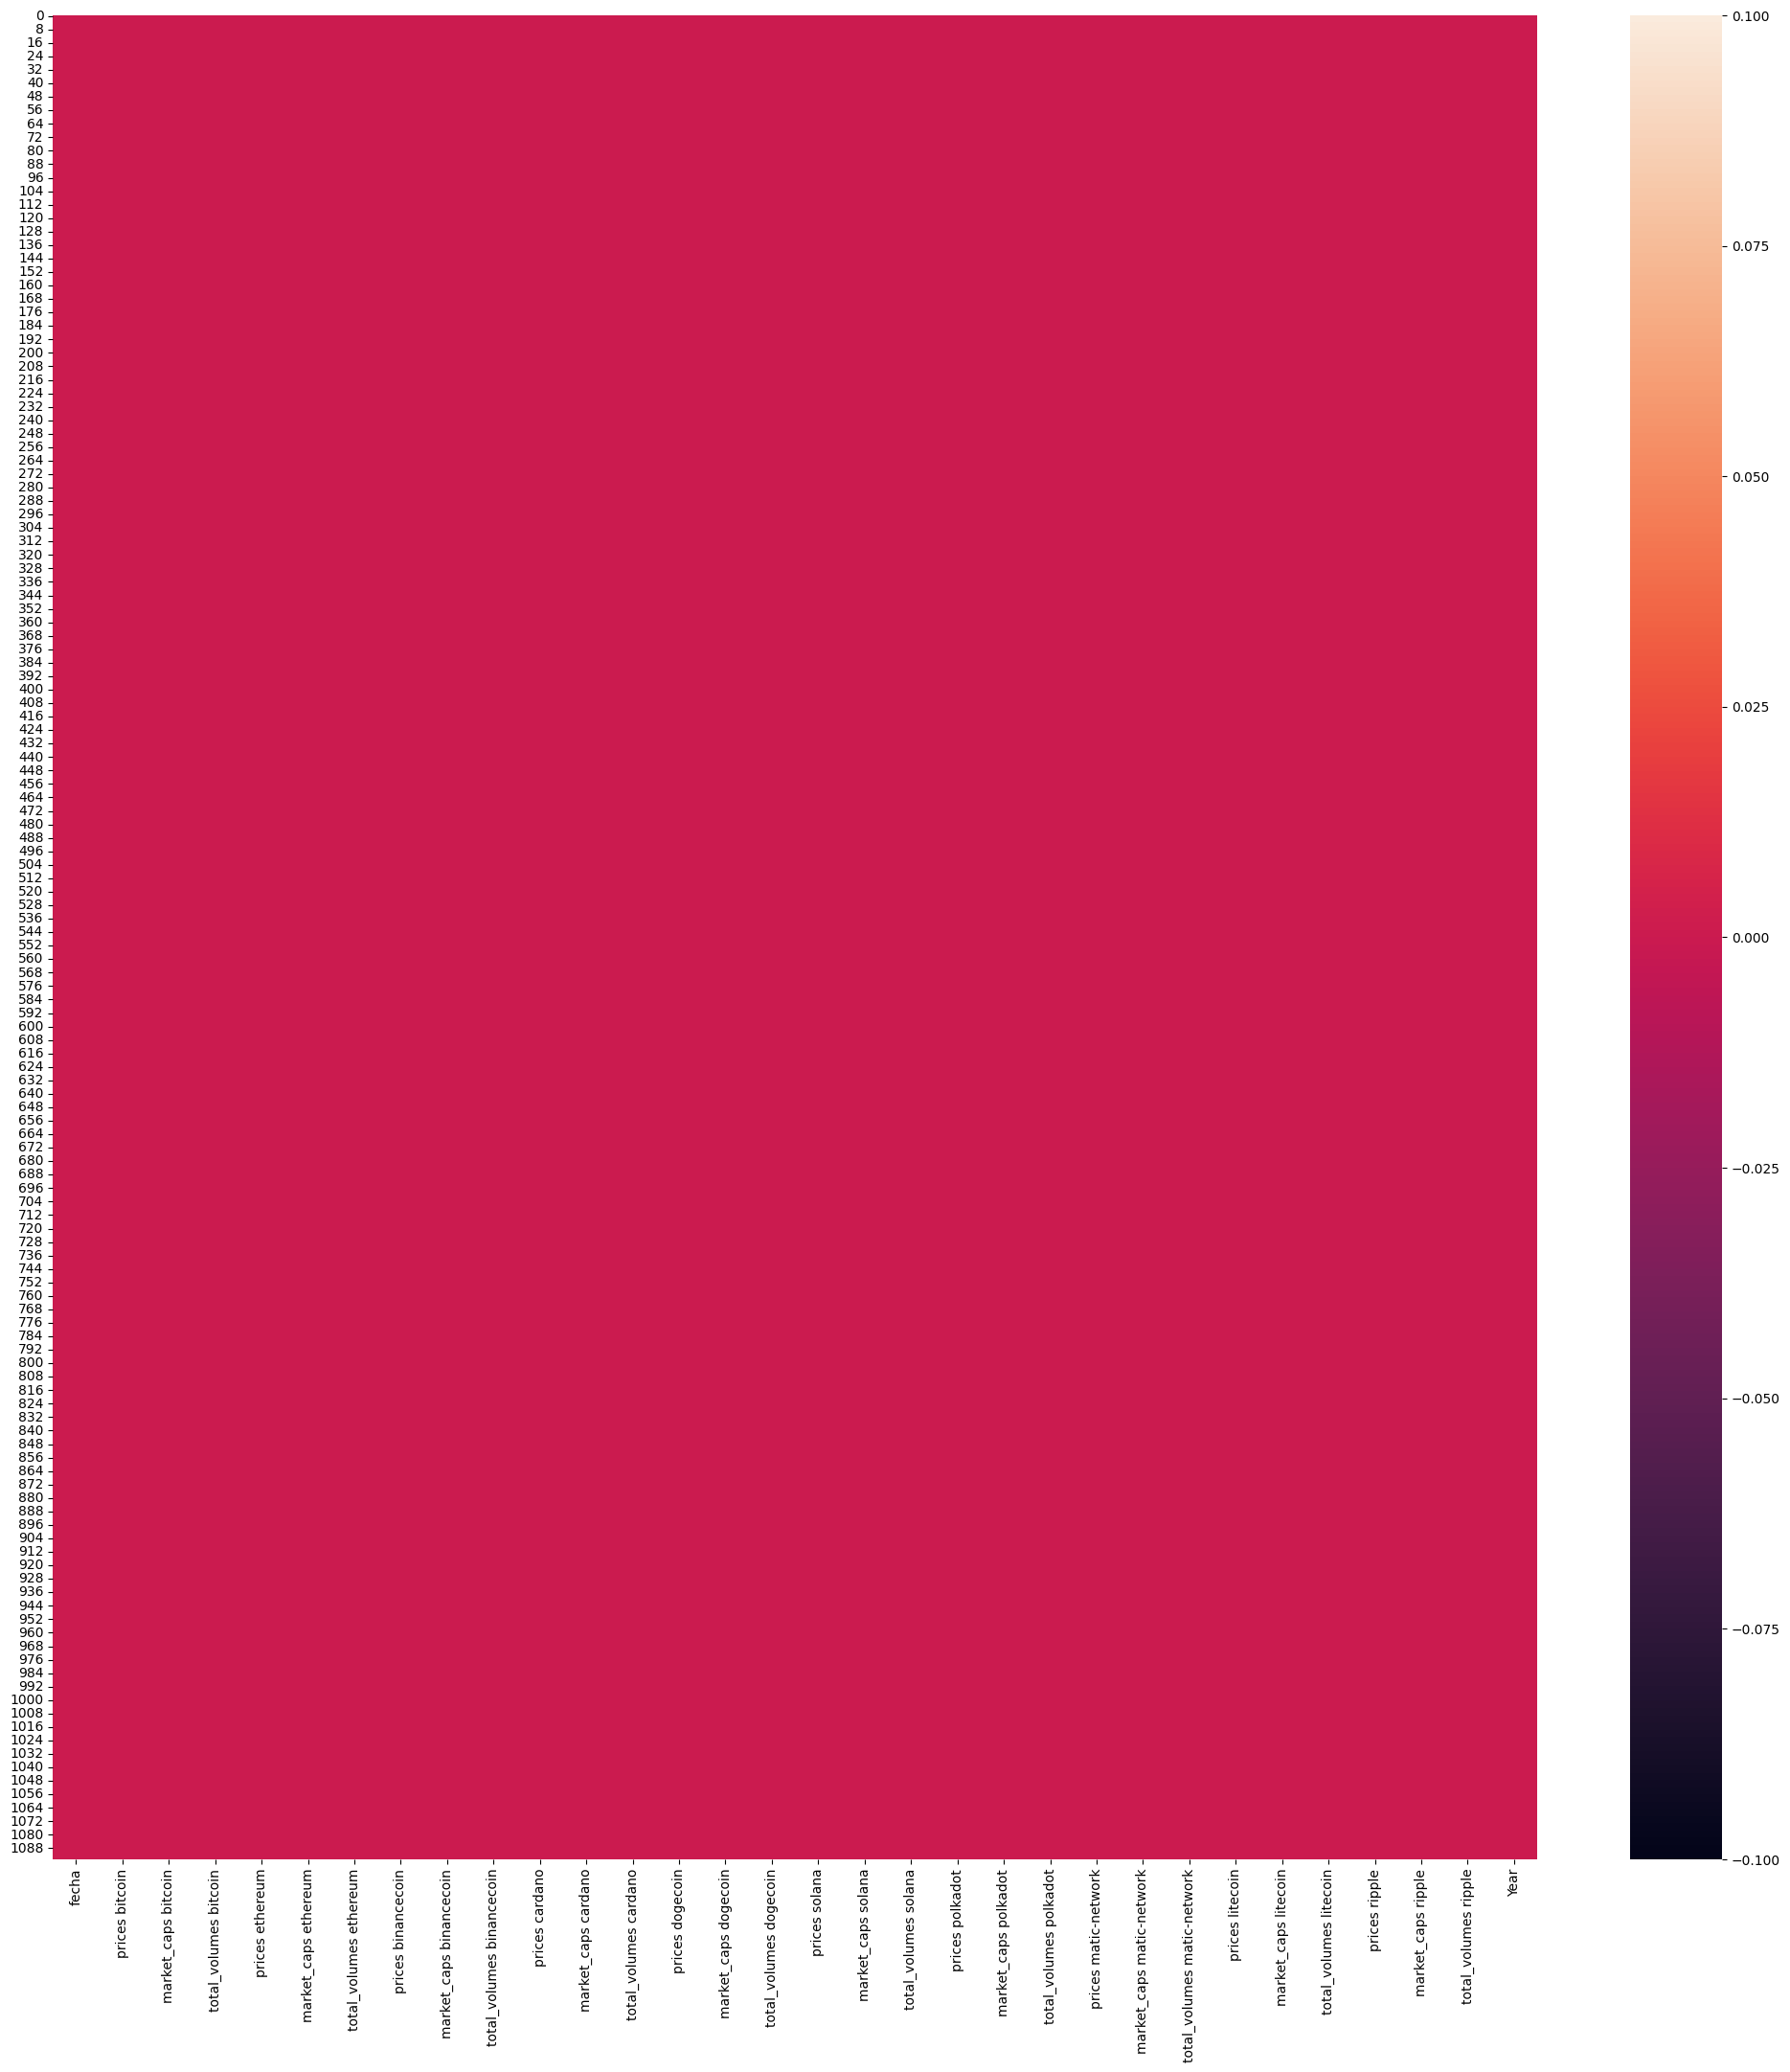

In [47]:
#Gráficando mapa de calor para conocer de visualmente si se enucentran valores nulos contenidos en las distintas variables del dataframe
plt.figure(figsize=[25,25])
sns.heatmap(df_total.isnull()) 
plt.show()

Se observa a través del gráfico de calor y la función empleada anteriormente (isnull()) para valdiar si existen valores nulos, que para las cryptomonedas seleccionadas no hay campos faltantes en cuanto a las tres avriables empleadas para analizar el comportamiento de las mismas a lo largo del tiempo

In [14]:
# Visualizando los valores duplicados
df_total.duplicated().any()

False

Observamos con la función anterior que no existen valores duplicados dentro del dataframe.

C:\Users\User\AppData\Local\Temp\ipykernel_12532\3627761424.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlac = df_total.corr()


<Axes: >

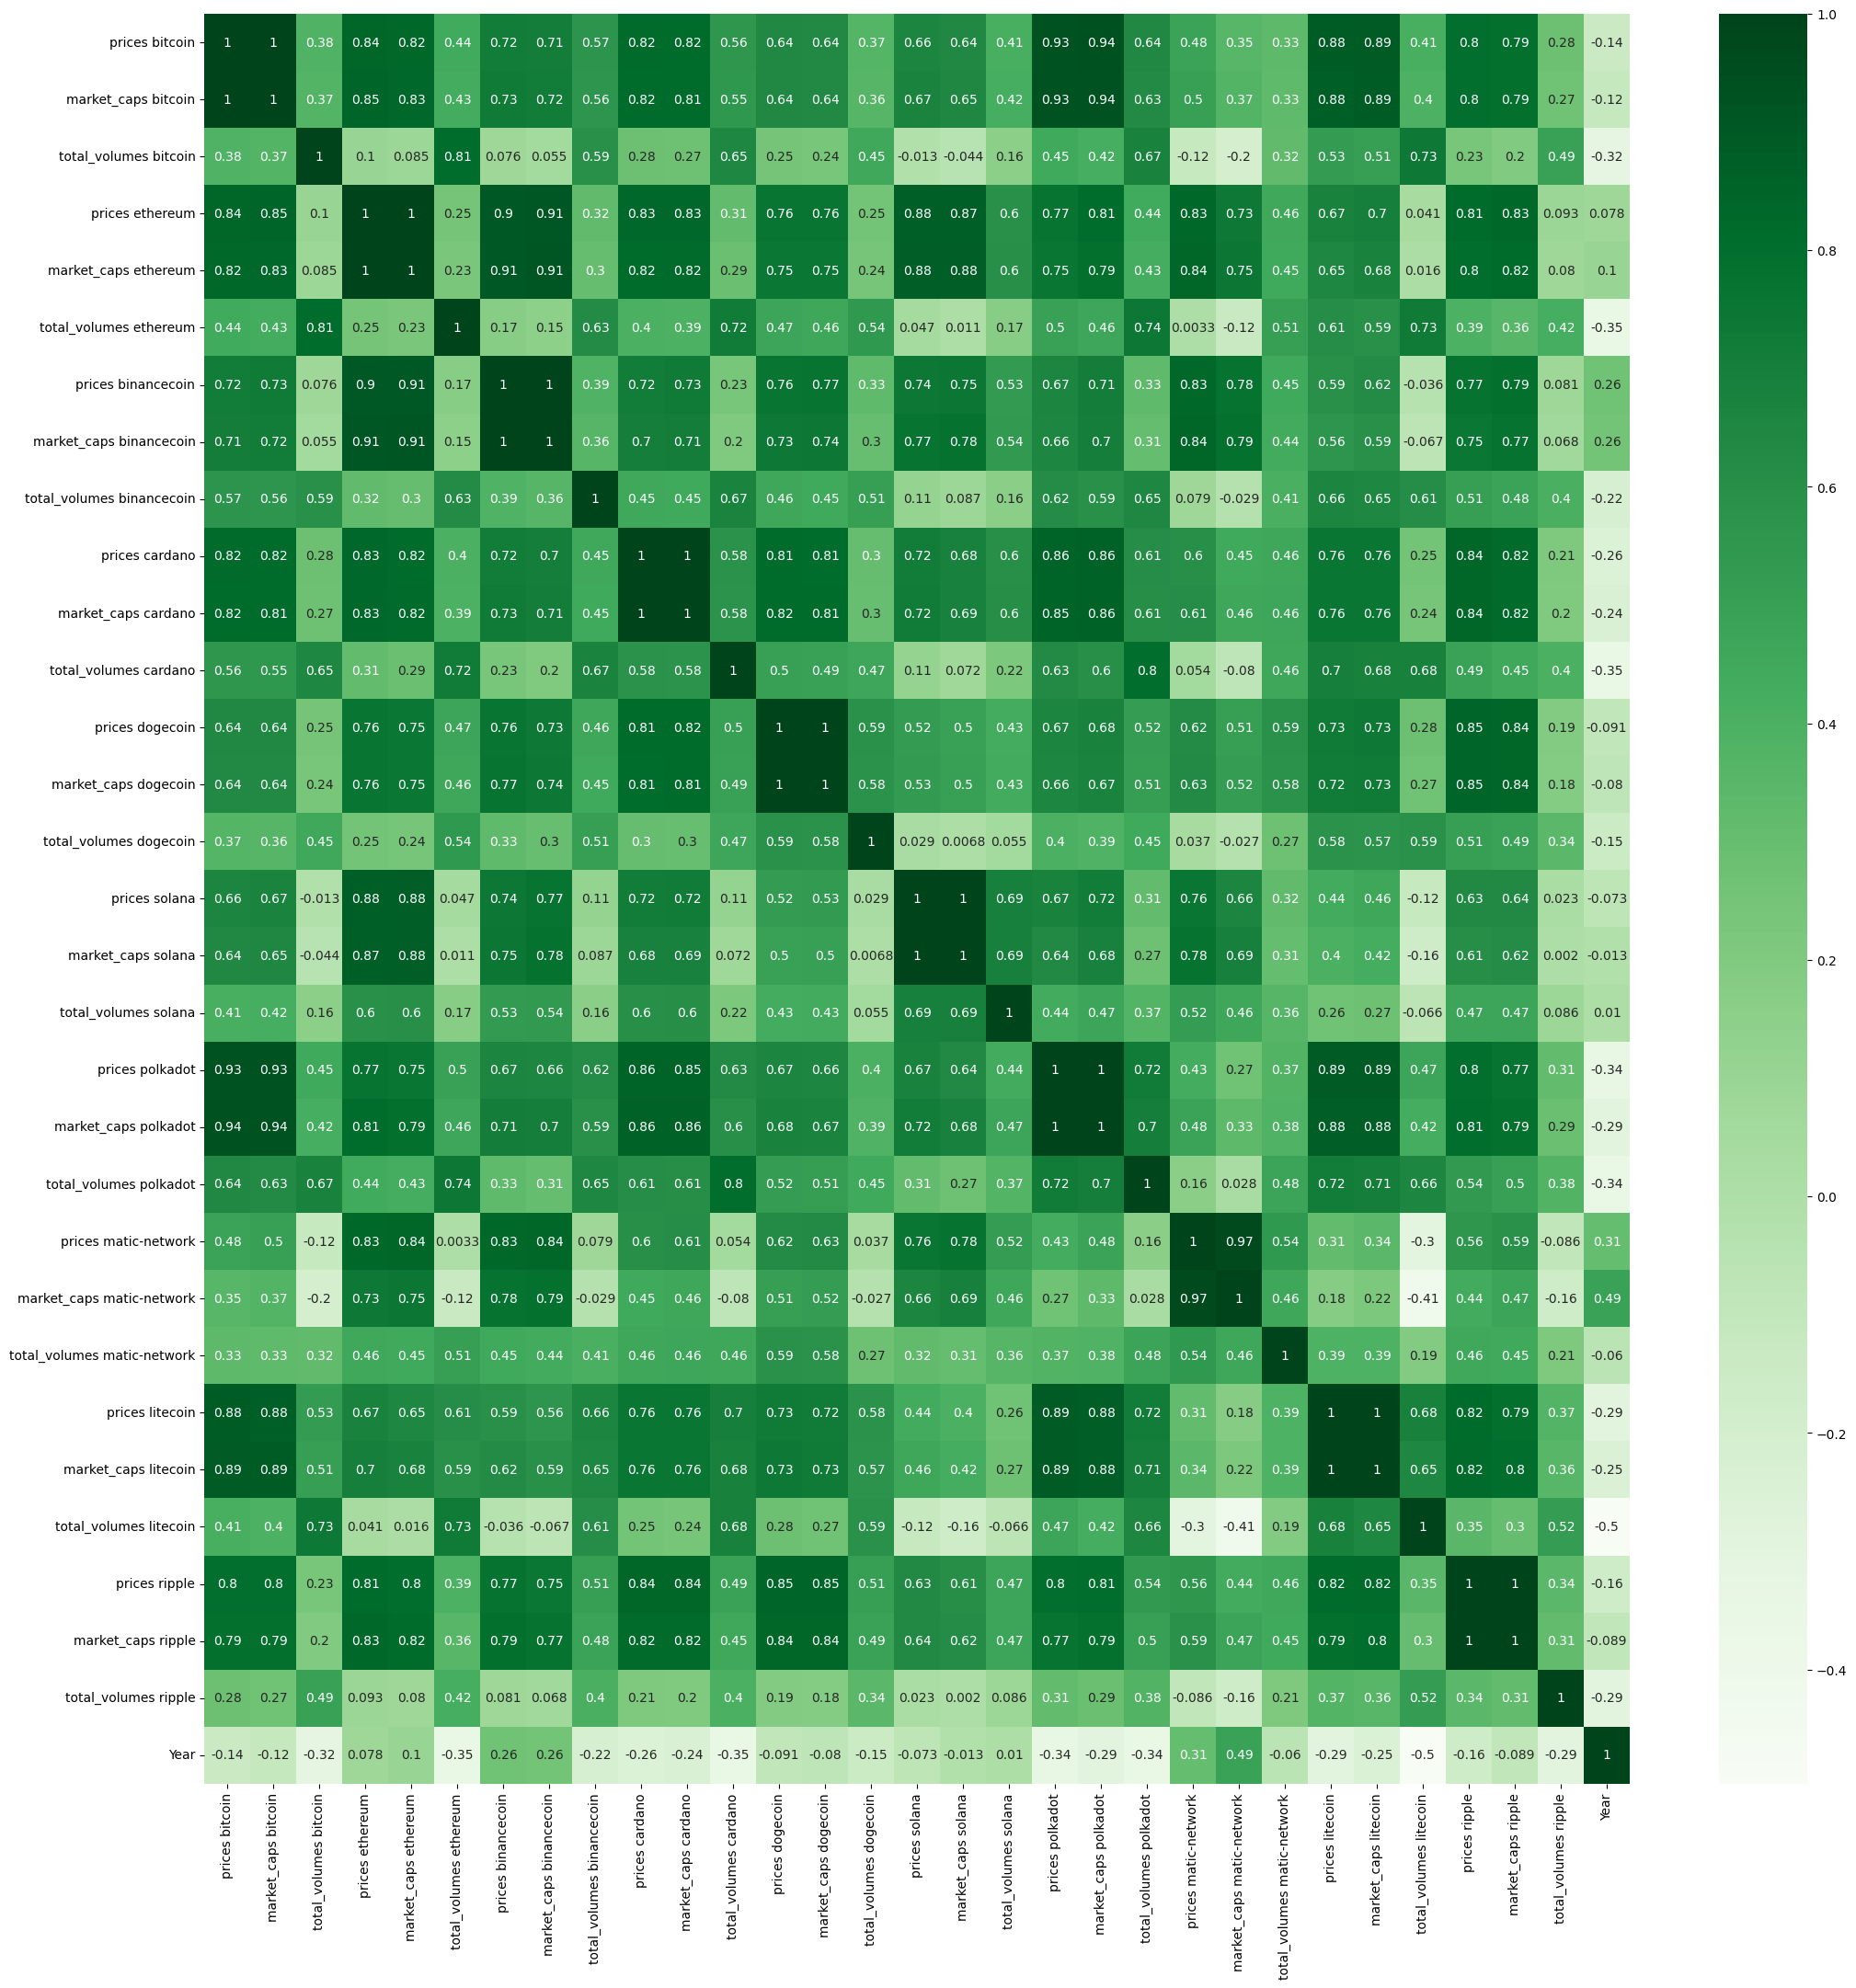

In [15]:
#visualizando la correlaciòn de las variables númericas del df
correlac = df_total.corr()
plt.figure(figsize=[25,25])
sns.heatmap(correlac, annot=True, cmap='Greens')

Con el mapa de calor podemos observar la correlación que existe entre las variables a usar para el anàlisis, y si estas estan relacionadas o no. Podemos observar como existe una relación entre cada una de ellas al comparar su valor con las demás, sin embargo esto no significa causalidad, es decir el hecho de que el valor de una de las variables tengan algún tipo de modificación no implicará que esta otra sufra un cambio por ello.

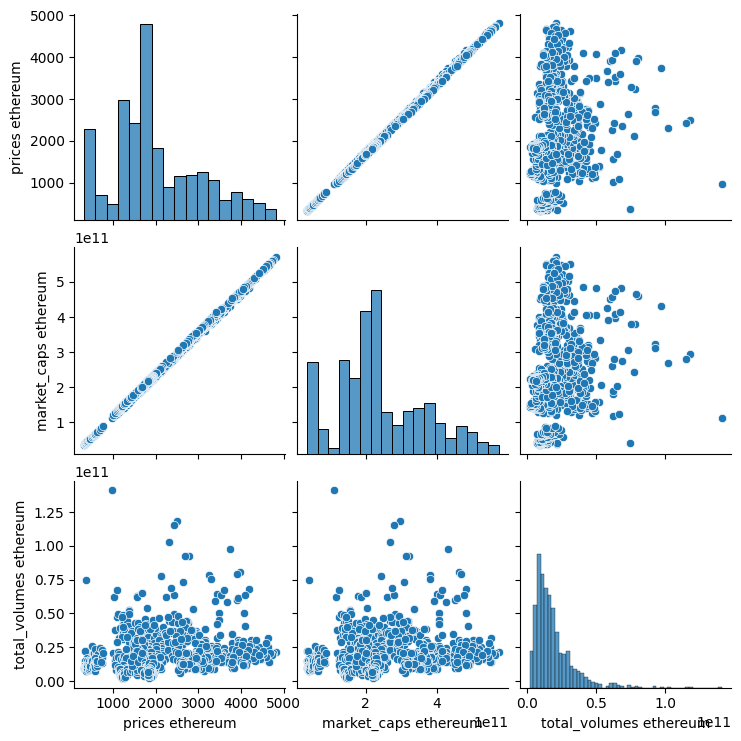

In [16]:
# Haciendo uso del pairplot, especificamente con las varibales correspondientes a ethereum
sns.pairplot(df_total.iloc[:,4:7])

Con este pairplot podemos observar la distribución y correlación entre las variables escogidas para analizar cada una de las criptomonedas seleccionadas, por tanto se deduce que la variable prices y market_cap estan estrechamente relacionadas, mientras que la variable volumen (transacciones en un tiempo determinado) no se encuentra relacionada con las dos anteriores.

Observando la correlación de las variables, especificamente el comportamiento del precio bitcoin con los precios de las demás monedas, observamos una correlación fuerte con ethereum, cardano y polkadot. Se realiza boxplot para validar como estan distribuidos los datos de estas criptomonedas, y también aquellas que no tienen una correlación tan estrecha como lo es solana.

C:\Users\User\AppData\Local\Temp\ipykernel_12532\3039365564.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(251)


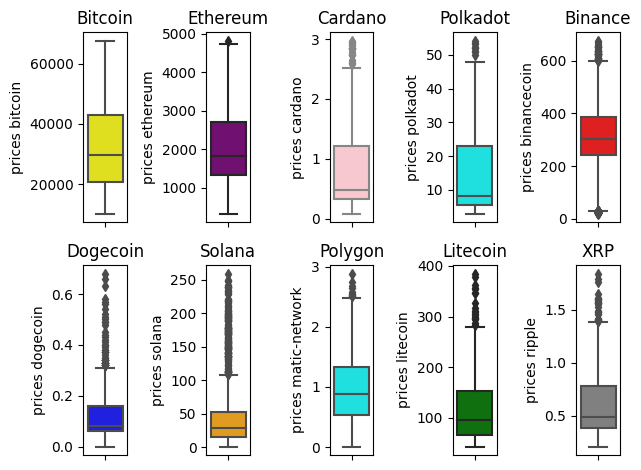

In [17]:
# Realizando Boxplot

plt.title("Distribución precios")

plt.subplot(251)
plt.title('Bitcoin')
sns.boxplot(y = df_total['prices bitcoin'],
            color = "yellow")


plt.subplot(252)
plt.title('Ethereum')
sns.boxplot(y = df_total['prices ethereum'],
            color = "purple")


plt.subplot(253)
plt.title('Cardano')
sns.boxplot(y = df_total['prices cardano'],
            color = "pink")


plt.subplot(254)
plt.title('Polkadot')
sns.boxplot(y = df_total['prices polkadot'],
            color = "cyan")


plt.subplot(255)
plt.title('Binance')
sns.boxplot(y = df_total['prices binancecoin'],
            color = "red")


plt.subplot(256)
plt.title('Dogecoin')
sns.boxplot(y = df_total['prices dogecoin'],
            color = "blue")


plt.subplot(257)
plt.title('Solana')
sns.boxplot(y = df_total['prices solana'],
            color = "orange")


plt.subplot(258)
plt.title('Polygon')
sns.boxplot(y = df_total['prices matic-network'],
            color = "cyan")

plt.subplot(259)
plt.title('Litecoin')
sns.boxplot(y = df_total['prices litecoin'],
            color = "green")

plt.subplot(2,5,10)
plt.title('XRP')
sns.boxplot(y = df_total['prices ripple'],
            color = "gray")


plt.tight_layout()

Observamos que para las cryptomonedas bitcoin y ethereum no existe una cantidad considerable de outliers, mientras que para cardano y polkadot si, sin embargo para fines del analisis no se eliminaran estos, pues las criptomonedas se caracterizan por tener un mayor grado de volatilidad respecto de los demás activos que existen en el mundo, es por ello que estos outliers pueden deberse a eventos especificos y que podrían llegar a ser de interes para análisis posteriores.

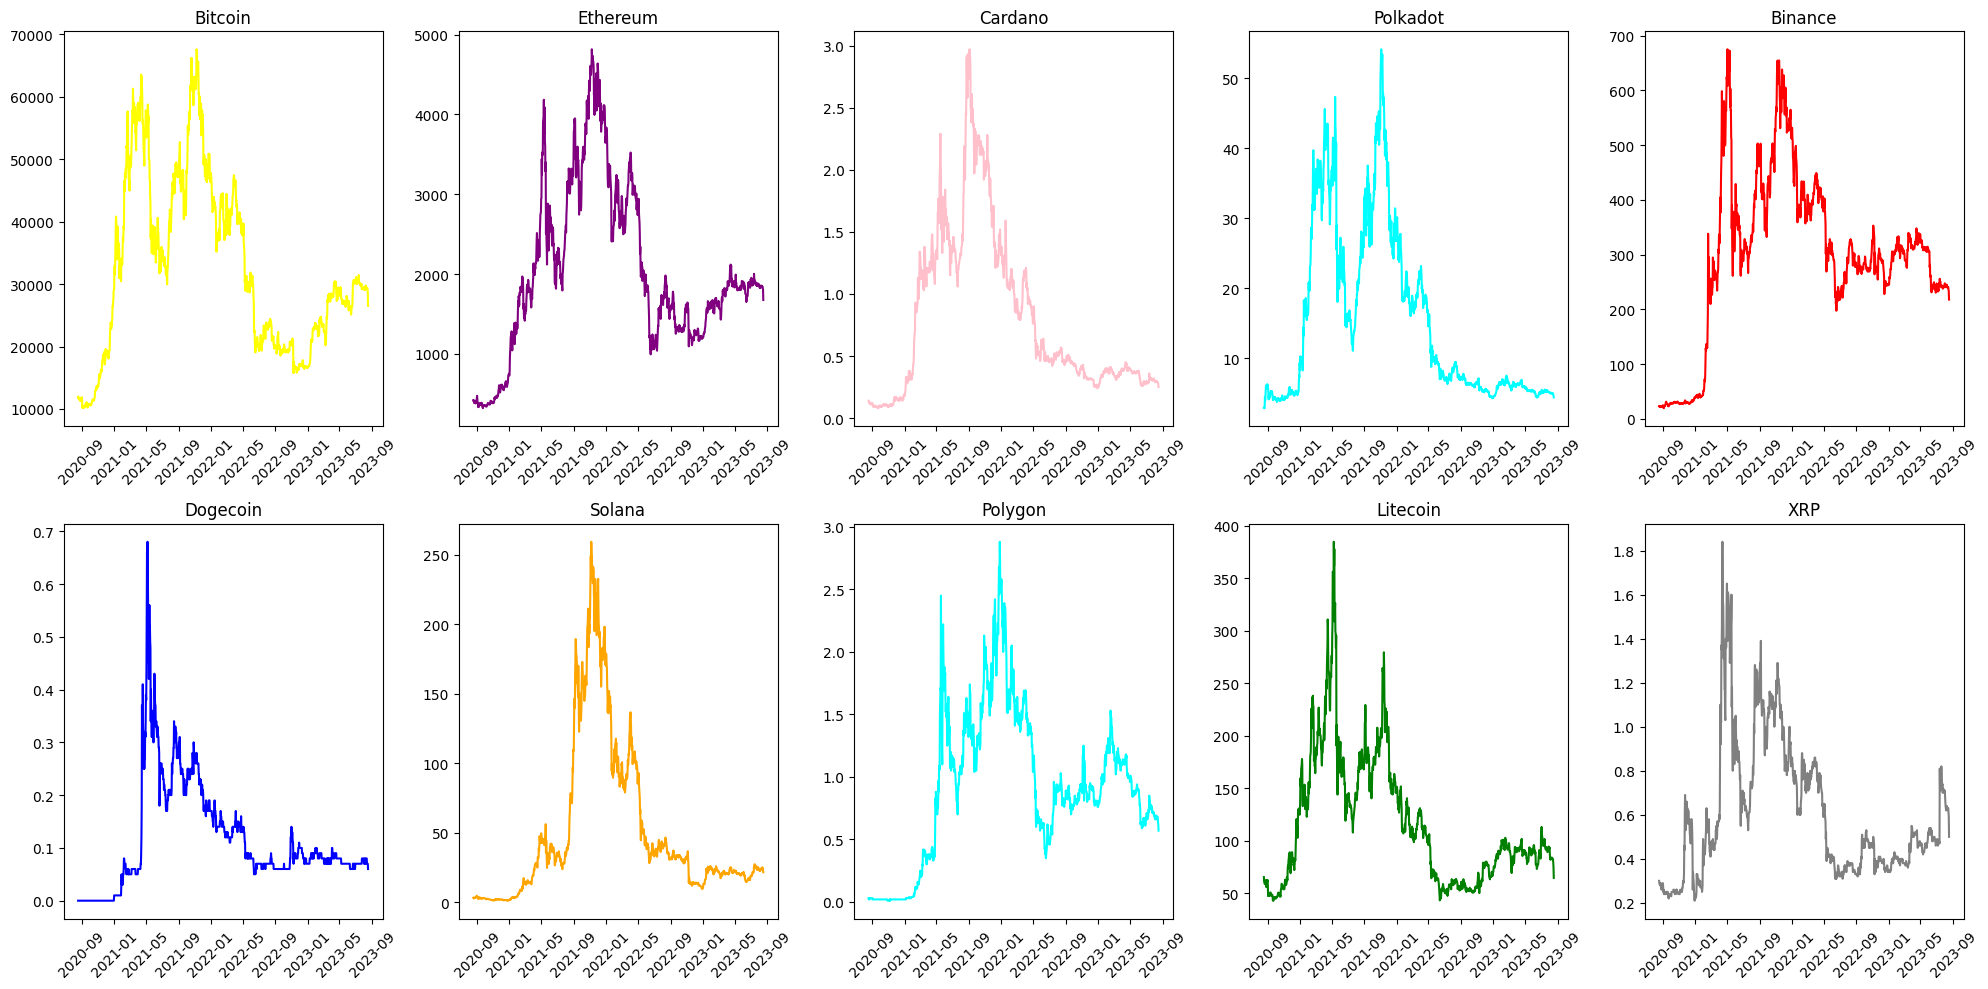

In [18]:
#Gráficando el precio de cada una de las monedas a lo largo del tiempo

plt.figure(figsize=[20,10])

plt.subplot(251)
plt.title('Bitcoin')
plt.plot(pd.to_datetime(df_total['fecha']),df_total['prices bitcoin'], color='yellow')
plt.xticks(rotation=45)

plt.subplot(252)
plt.title('Ethereum')
plt.plot(pd.to_datetime(df_total['fecha']),df_total['prices ethereum'], color='purple')
plt.xticks(rotation=45)

plt.subplot(253)
plt.title('Cardano')
plt.plot(pd.to_datetime(df_total['fecha']),df_total['prices cardano'], color='pink')
plt.xticks(rotation=45)

plt.subplot(254)
plt.title('Polkadot')
plt.plot(pd.to_datetime(df_total['fecha']),df_total['prices polkadot'],color='cyan')
plt.xticks(rotation=45)


plt.subplot(255)
plt.title('Binance')
plt.plot(pd.to_datetime(df_total['fecha']),df_total['prices binancecoin'], color='red')
plt.xticks(rotation=45)

plt.subplot(256)
plt.title('Dogecoin')
plt.plot(pd.to_datetime(df_total['fecha']),df_total['prices dogecoin'], color='blue')
plt.xticks(rotation=45)


plt.subplot(257)
plt.title('Solana')
plt.plot(pd.to_datetime(df_total['fecha']),df_total['prices solana'], color='orange')
plt.xticks(rotation=45)

plt.subplot(258)
plt.title('Polygon')
plt.plot(pd.to_datetime(df_total['fecha']),df_total['prices matic-network'], color='cyan')
plt.xticks(rotation=45)

plt.subplot(259)
plt.title('Litecoin')
plt.plot(pd.to_datetime(df_total['fecha']),df_total['prices litecoin'], color='green')
plt.xticks(rotation=45)

plt.subplot(2,5,10)
plt.title('XRP')
plt.plot(pd.to_datetime(df_total['fecha']),df_total['prices ripple'], color='gray')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

Con estas gráficas observamos el comportamiento histórico de las variables, corroborando así la correlación positiva entre la mayoría de estas. Siendo el lapso entre el año 2021 y mediados del año 2022, cuando se genera un incremento considerable del precio y posteriormente la fluctuación tiende a disminuir y estabilizarse a lo alrgo del tiempo.

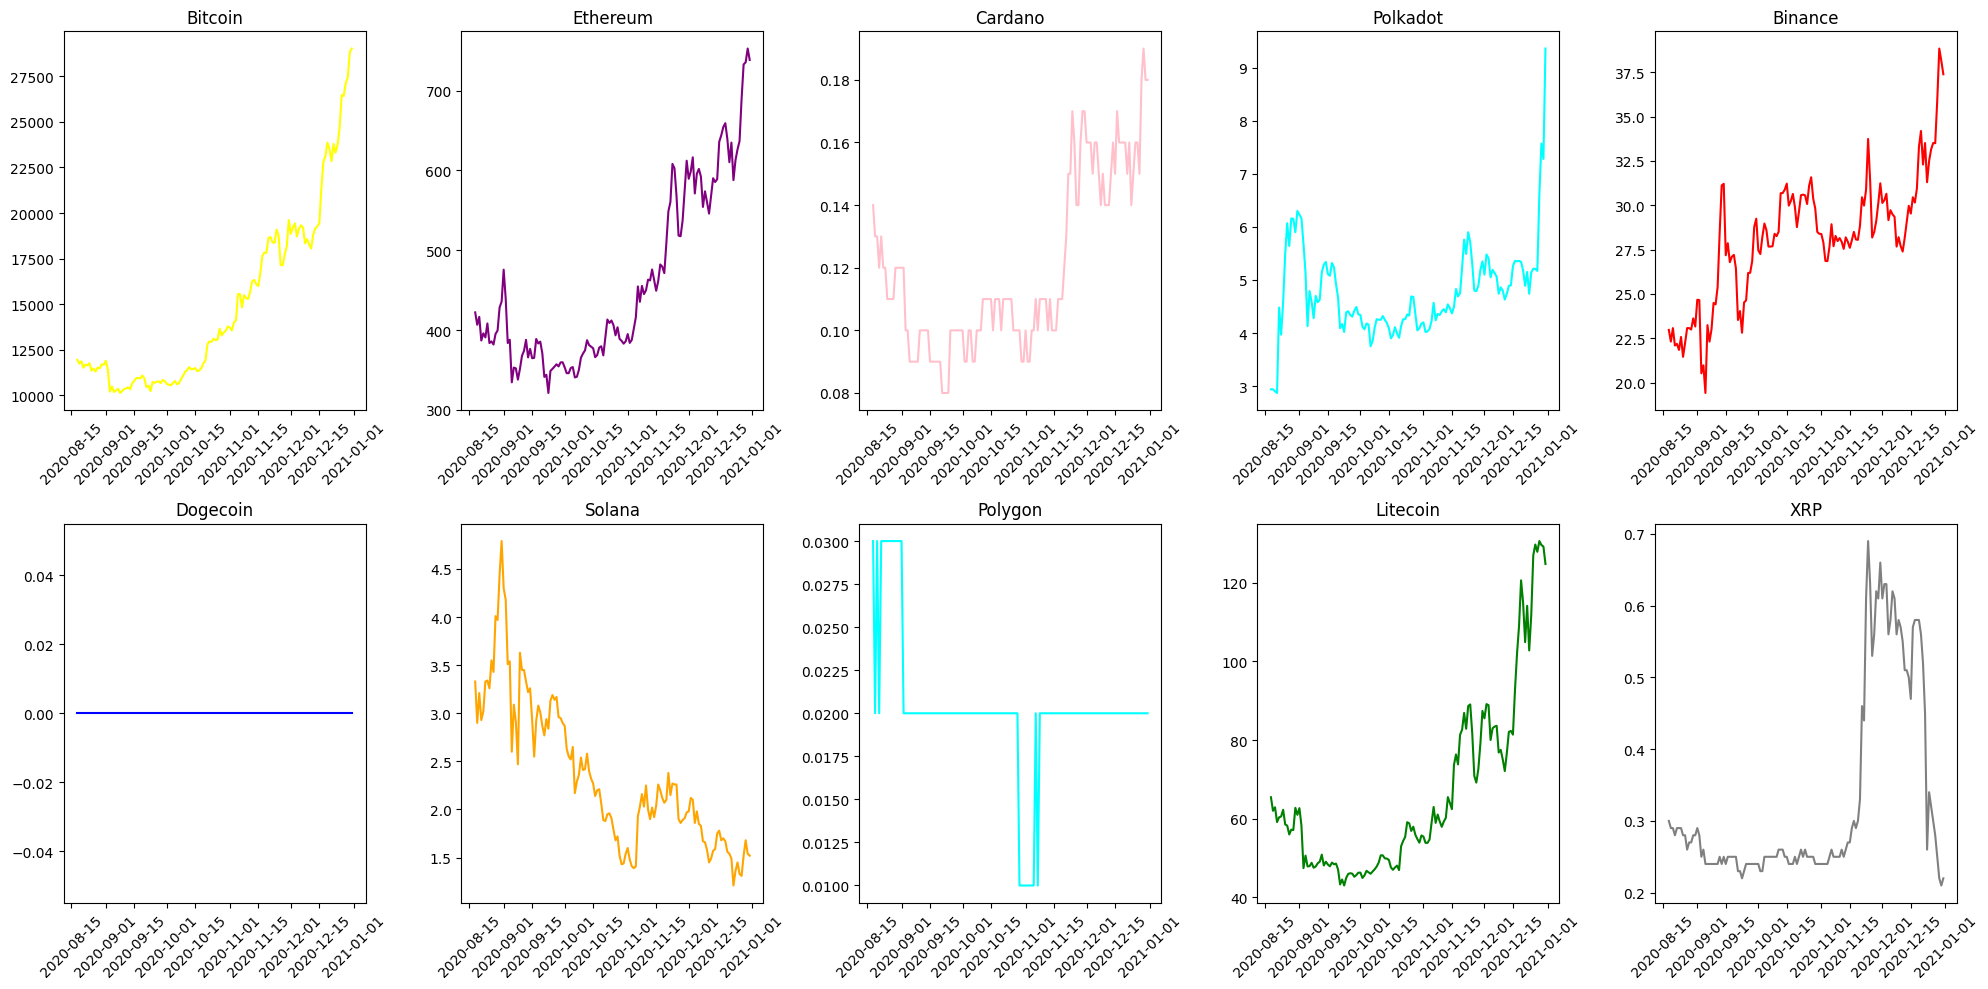

In [41]:
#Gráficando el precio de cada una de las monedas a lo largo del año 2020

plt.figure(figsize=[20,10])

plt.subplot(251)
plt.title('Bitcoin')
plt.plot(df_total['fecha'][df_total['Year']==2020],df_total['prices bitcoin'][df_total['Year']==2020], color='yellow')
plt.xticks(rotation=45)

plt.subplot(252)
plt.title('Ethereum')
plt.plot(df_total['fecha'][df_total['Year']==2020],df_total['prices ethereum'][df_total['Year']==2020], color='purple')
plt.xticks(rotation=45)

plt.subplot(253)
plt.title('Cardano')
plt.plot(df_total['fecha'][df_total['Year']==2020],df_total['prices cardano'][df_total['Year']==2020], color='pink')
plt.xticks(rotation=45)

plt.subplot(254)
plt.title('Polkadot')
plt.plot(df_total['fecha'][df_total['Year']==2020],df_total['prices polkadot'][df_total['Year']==2020],color='cyan')
plt.xticks(rotation=45)


plt.subplot(255)
plt.title('Binance')
plt.plot(df_total['fecha'][df_total['Year']==2020],df_total['prices binancecoin'][df_total['Year']==2020], color='red')
plt.xticks(rotation=45)

plt.subplot(256)
plt.title('Dogecoin')
plt.plot(df_total['fecha'][df_total['Year']==2020],df_total['prices dogecoin'][df_total['Year']==2020], color='blue')
plt.xticks(rotation=45)


plt.subplot(257)
plt.title('Solana')
plt.plot(df_total['fecha'][df_total['Year']==2020],df_total['prices solana'][df_total['Year']==2020], color='orange')
plt.xticks(rotation=45)

plt.subplot(258)
plt.title('Polygon')
plt.plot(df_total['fecha'][df_total['Year']==2020],df_total['prices matic-network'][df_total['Year']==2020], color='cyan')
plt.xticks(rotation=45)

plt.subplot(259)
plt.title('Litecoin')
plt.plot(df_total['fecha'][df_total['Year']==2020],df_total['prices litecoin'][df_total['Year']==2020], color='green')
plt.xticks(rotation=45)

plt.subplot(2,5,10)
plt.title('XRP')
plt.plot(df_total['fecha'][df_total['Year']==2020],df_total['prices ripple'][df_total['Year']==2020], color='gray')
plt.xticks(rotation=45)



plt.tight_layout()
plt.show()

En esta gráfica observamos 8una tendencia alcista patra la mayoría de las criptomonedas, corroborando la relación que ecxiste entre el comportamiento de algunas como lo son bitcoin, ethreum,cardano, polkadot, binance y litecoin; por su parte se tiene gran volatilidad con tendencia decreciente respecto del comportamiento del precio para solana , polygon, xrp. Por ultimo para dogecoin evidenciamos que el precio se mantiene en ceros, por lo cuál no era una criptomoneda que se encontrará a la vista de los traders.

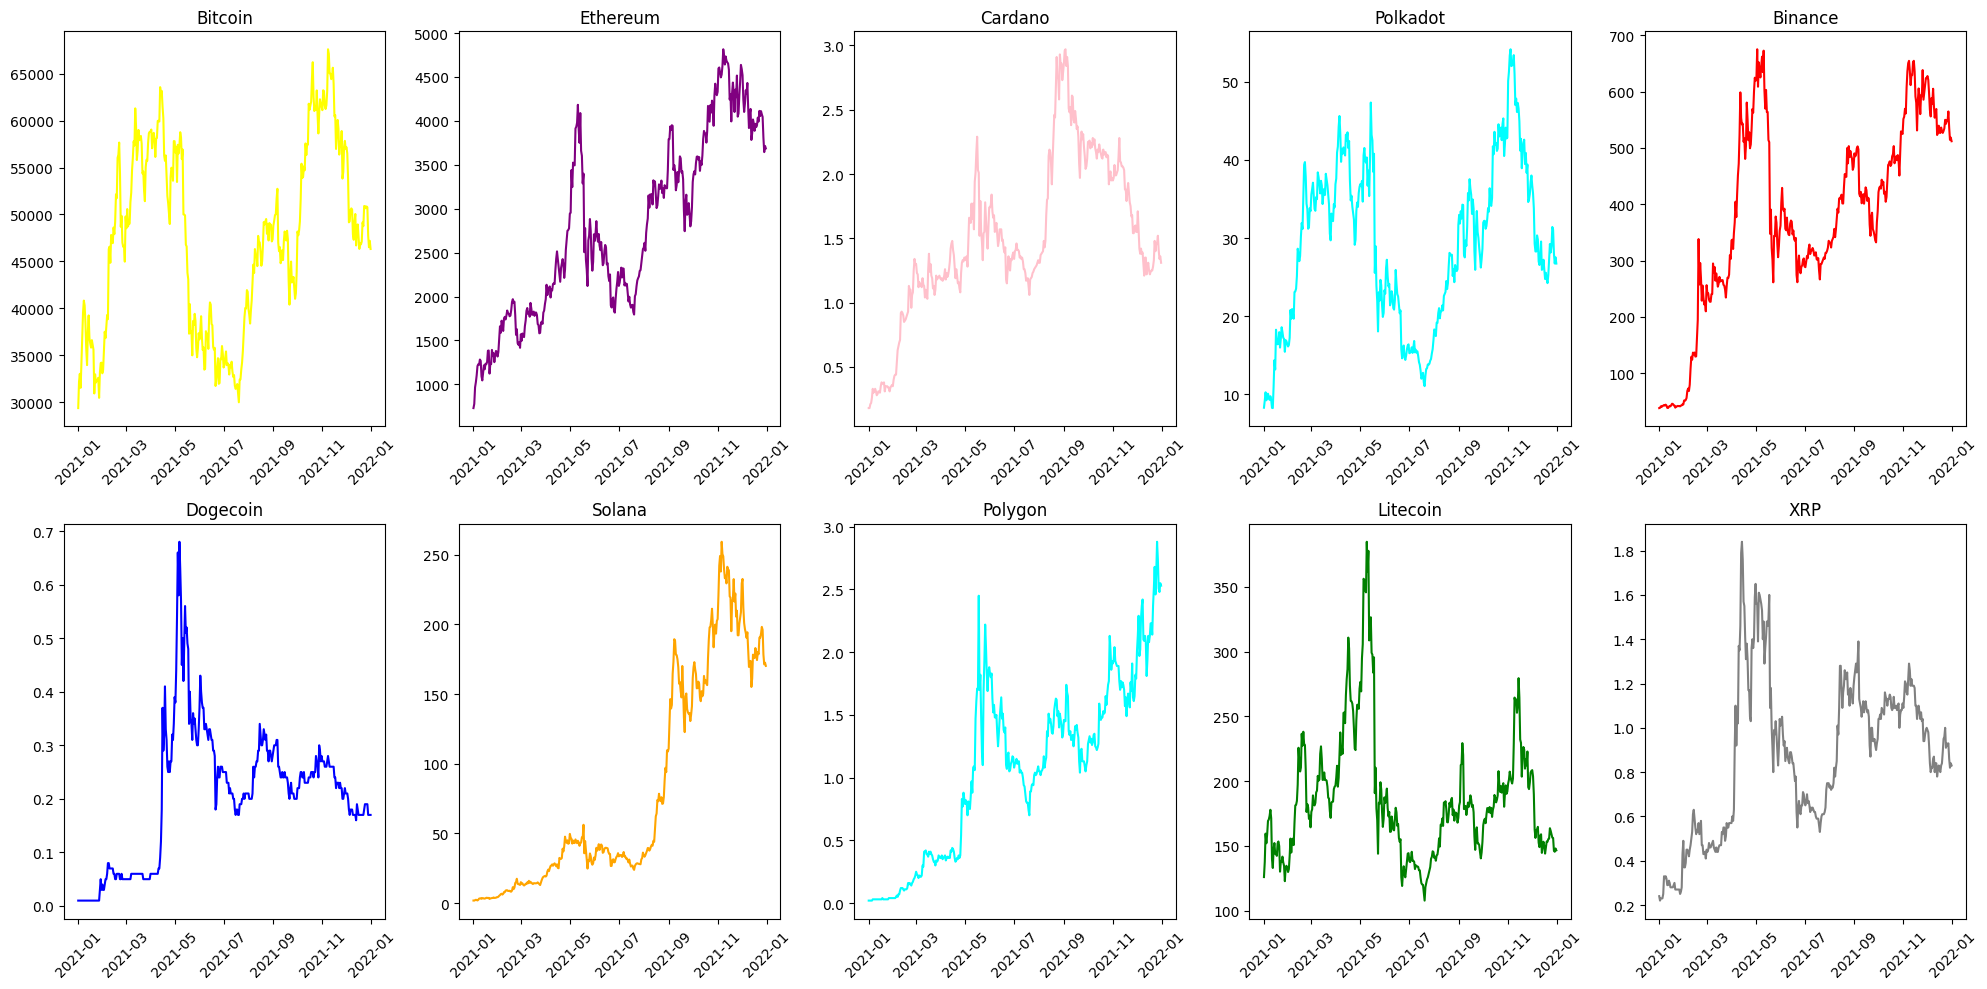

In [42]:
#Gráficando el precio de cada una de las monedas a lo largo del año 2021

plt.figure(figsize=[20,10])

plt.subplot(251)
plt.title('Bitcoin')
plt.plot(df_total['fecha'][df_total['Year']==2021],df_total['prices bitcoin'][df_total['Year']==2021], color='yellow')
plt.xticks(rotation=45)

plt.subplot(252)
plt.title('Ethereum')
plt.plot(df_total['fecha'][df_total['Year']==2021],df_total['prices ethereum'][df_total['Year']==2021], color='purple')
plt.xticks(rotation=45)

plt.subplot(253)
plt.title('Cardano')
plt.plot(df_total['fecha'][df_total['Year']==2021],df_total['prices cardano'][df_total['Year']==2021], color='pink')
plt.xticks(rotation=45)

plt.subplot(254)
plt.title('Polkadot')
plt.plot(df_total['fecha'][df_total['Year']==2021],df_total['prices polkadot'][df_total['Year']==2021],color='cyan')
plt.xticks(rotation=45)


plt.subplot(255)
plt.title('Binance')
plt.plot(df_total['fecha'][df_total['Year']==2021],df_total['prices binancecoin'][df_total['Year']==2021], color='red')
plt.xticks(rotation=45)

plt.subplot(256)
plt.title('Dogecoin')
plt.plot(df_total['fecha'][df_total['Year']==2021],df_total['prices dogecoin'][df_total['Year']==2021], color='blue')
plt.xticks(rotation=45)


plt.subplot(257)
plt.title('Solana')
plt.plot(df_total['fecha'][df_total['Year']==2021],df_total['prices solana'][df_total['Year']==2021], color='orange')
plt.xticks(rotation=45)

plt.subplot(258)
plt.title('Polygon')
plt.plot(df_total['fecha'][df_total['Year']==2021],df_total['prices matic-network'][df_total['Year']==2021], color='cyan')
plt.xticks(rotation=45)

plt.subplot(259)
plt.title('Litecoin')
plt.plot(df_total['fecha'][df_total['Year']==2021],df_total['prices litecoin'][df_total['Year']==2021], color='green')
plt.xticks(rotation=45)

plt.subplot(2,5,10)
plt.title('XRP')
plt.plot(df_total['fecha'][df_total['Year']==2021],df_total['prices ripple'][df_total['Year']==2021], color='gray')
plt.xticks(rotation=45)



plt.tight_layout()
plt.show()

Para el año 2021, evidenciamos un cambio positivo en cuanto al precio de cotización del mercado para todas las criptomonedas objeto de estudio, destacando los valles o dosminuciones presentadas para la mayoría durante el mes de mayo, junio y julio, respectivamente

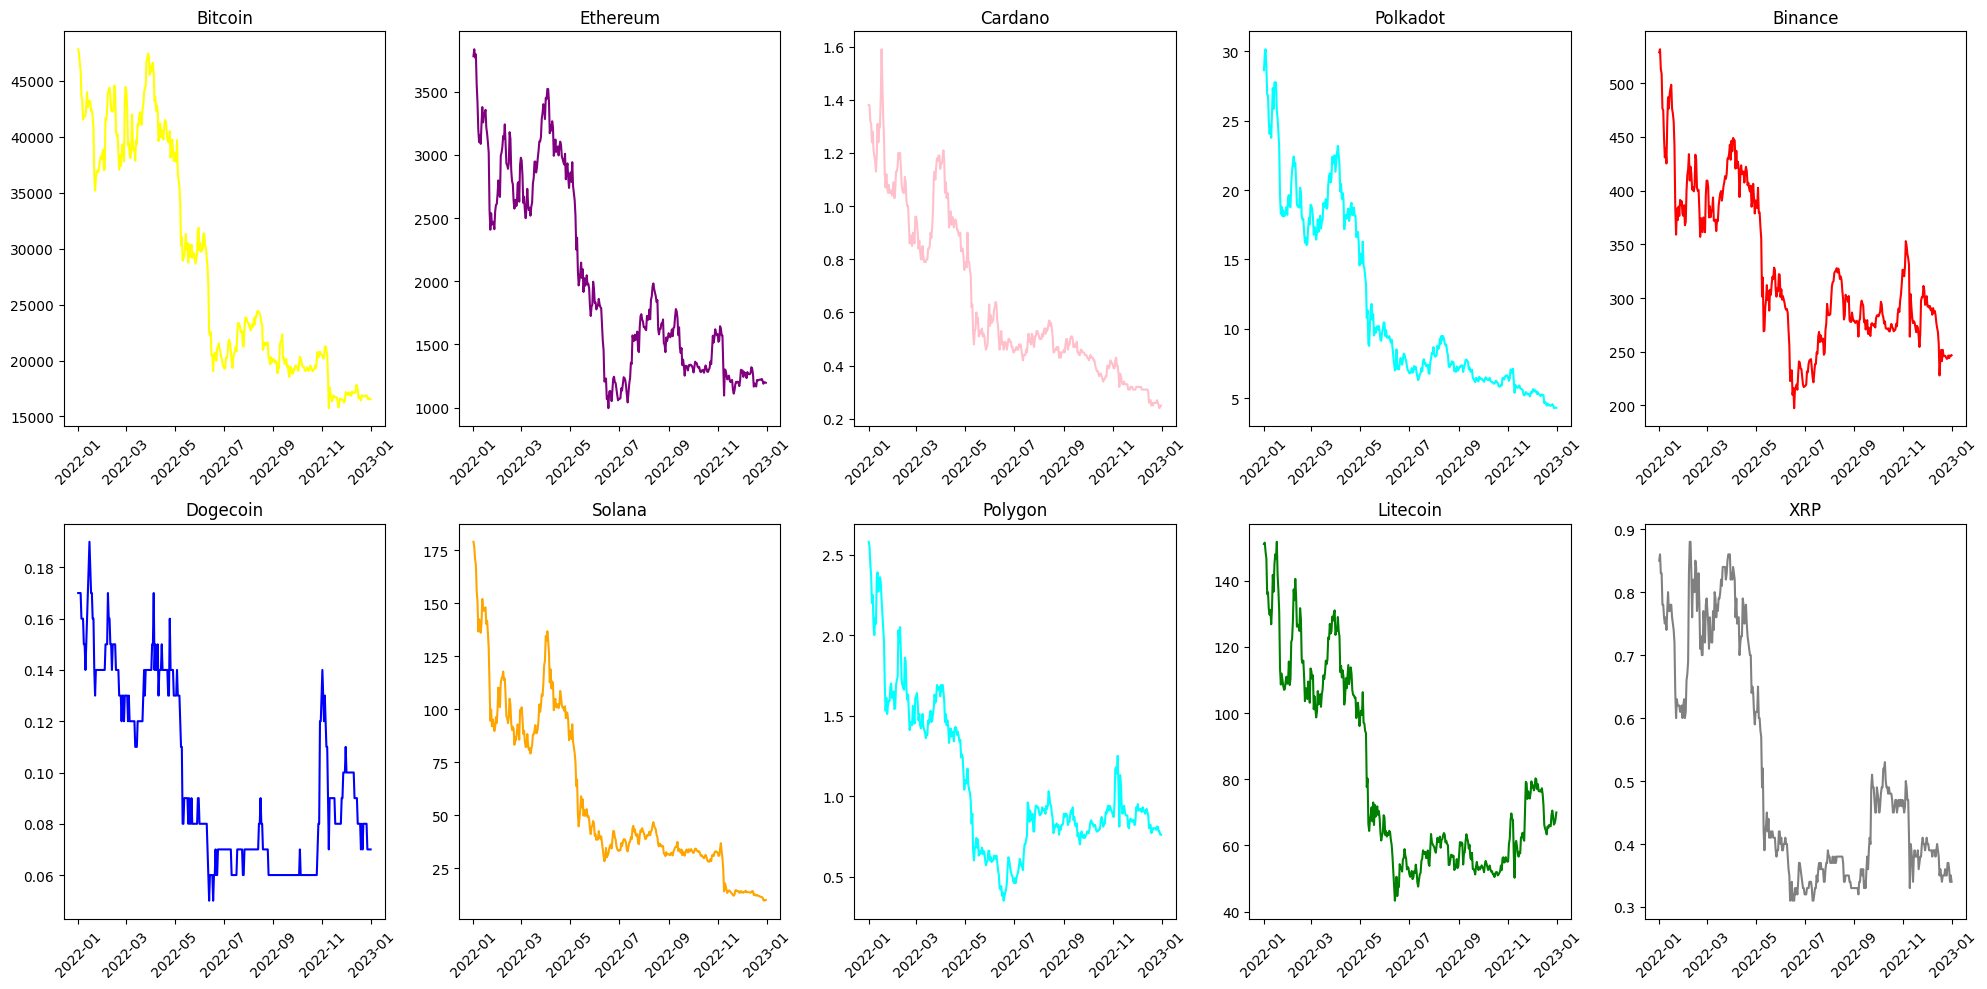

In [43]:
#Gráficando el precio de cada una de las monedas a lo largo del año 2022

plt.figure(figsize=[20,10])

plt.subplot(251)
plt.title('Bitcoin')
plt.plot(df_total['fecha'][df_total['Year']==2022],df_total['prices bitcoin'][df_total['Year']==2022], color='yellow')
plt.xticks(rotation=45)

plt.subplot(252)
plt.title('Ethereum')
plt.plot(df_total['fecha'][df_total['Year']==2022],df_total['prices ethereum'][df_total['Year']==2022], color='purple')
plt.xticks(rotation=45)

plt.subplot(253)
plt.title('Cardano')
plt.plot(df_total['fecha'][df_total['Year']==2022],df_total['prices cardano'][df_total['Year']==2022], color='pink')
plt.xticks(rotation=45)

plt.subplot(254)
plt.title('Polkadot')
plt.plot(df_total['fecha'][df_total['Year']==2022],df_total['prices polkadot'][df_total['Year']==2022],color='cyan')
plt.xticks(rotation=45)


plt.subplot(255)
plt.title('Binance')
plt.plot(df_total['fecha'][df_total['Year']==2022],df_total['prices binancecoin'][df_total['Year']==2022], color='red')
plt.xticks(rotation=45)

plt.subplot(256)
plt.title('Dogecoin')
plt.plot(df_total['fecha'][df_total['Year']==2022],df_total['prices dogecoin'][df_total['Year']==2022], color='blue')
plt.xticks(rotation=45)


plt.subplot(257)
plt.title('Solana')
plt.plot(df_total['fecha'][df_total['Year']==2022],df_total['prices solana'][df_total['Year']==2022], color='orange')
plt.xticks(rotation=45)

plt.subplot(258)
plt.title('Polygon')
plt.plot(df_total['fecha'][df_total['Year']==2022],df_total['prices matic-network'][df_total['Year']==2022], color='cyan')
plt.xticks(rotation=45)

plt.subplot(259)
plt.title('Litecoin')
plt.plot(df_total['fecha'][df_total['Year']==2022],df_total['prices litecoin'][df_total['Year']==2022], color='green')
plt.xticks(rotation=45)

plt.subplot(2,5,10)
plt.title('XRP')
plt.plot(df_total['fecha'][df_total['Year']==2022],df_total['prices ripple'][df_total['Year']==2022], color='gray')
plt.xticks(rotation=45)



plt.tight_layout()
plt.show()

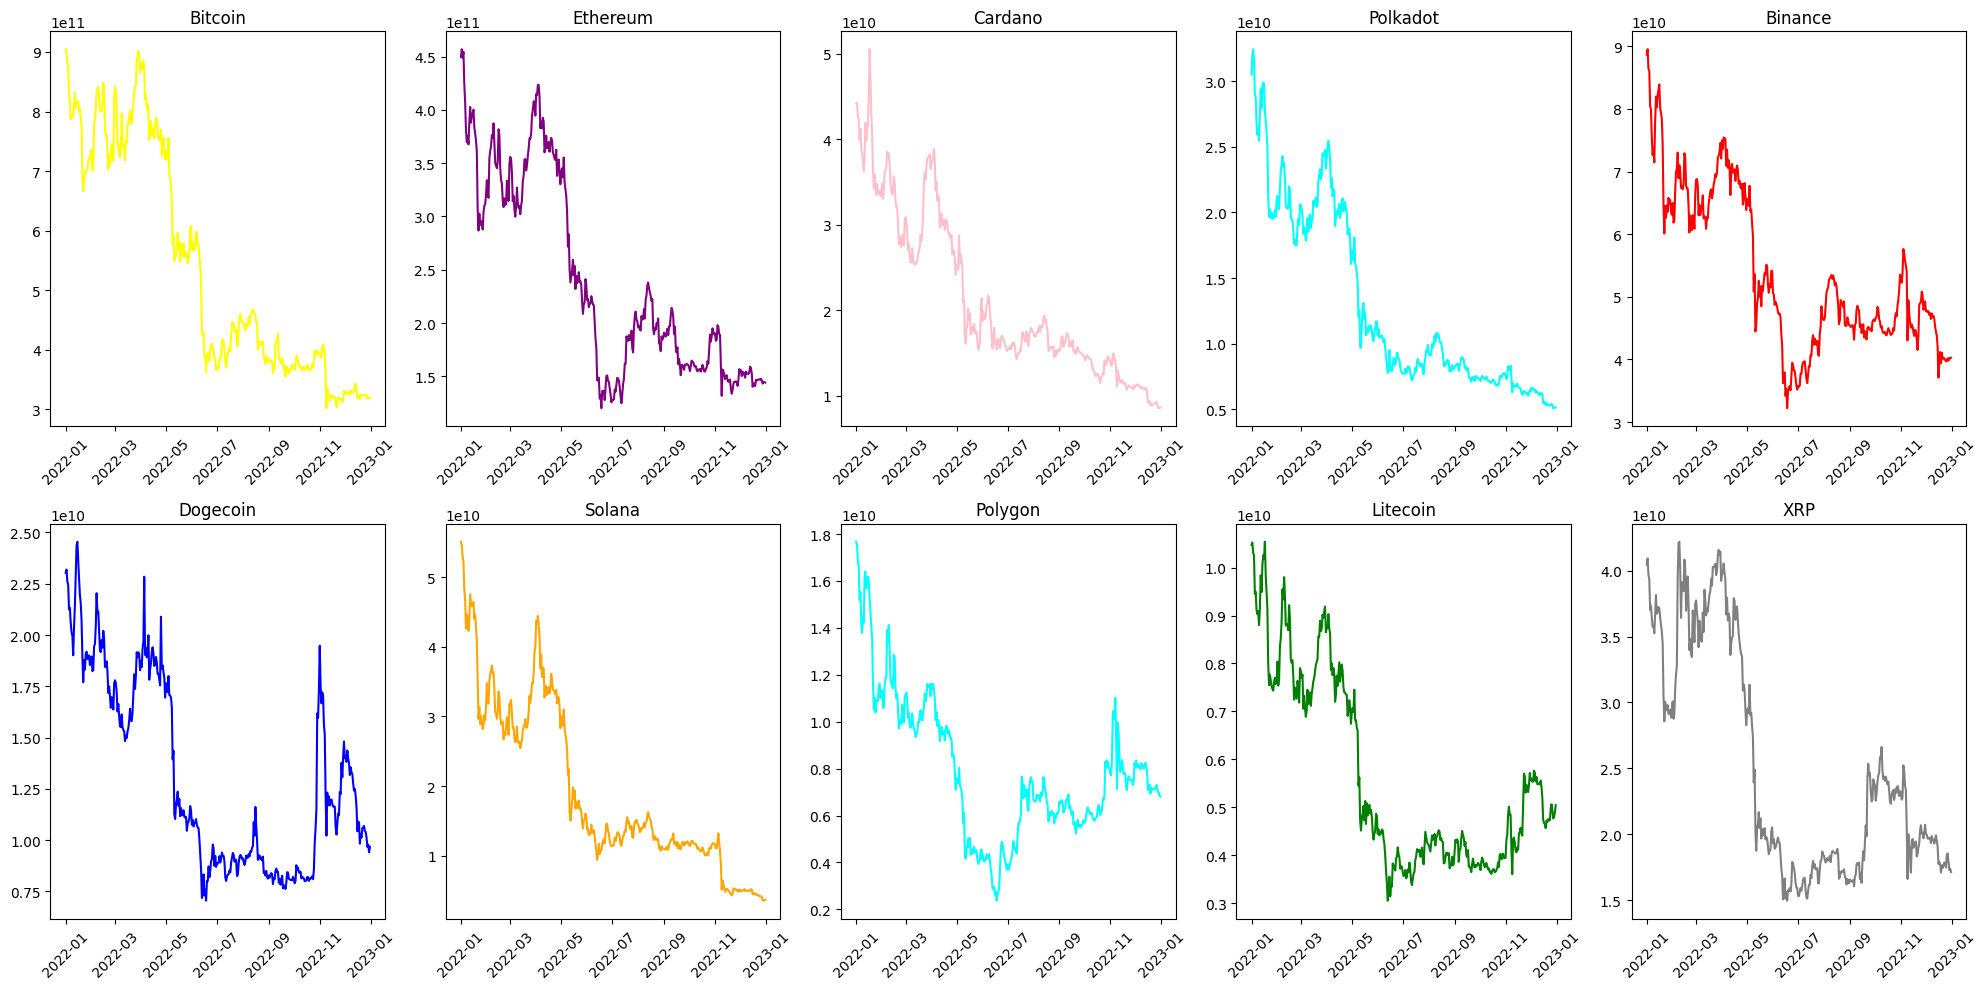

In [45]:
#Gráficando el market_caps de cada una de las monedas a lo largo del año 2022

plt.figure(figsize=[20,10])

plt.subplot(251)
plt.title('Bitcoin')
plt.plot(df_total['fecha'][df_total['Year']==2022],df_total['market_caps bitcoin'][df_total['Year']==2022], color='yellow')
plt.xticks(rotation=45)

plt.subplot(252)
plt.title('Ethereum')
plt.plot(df_total['fecha'][df_total['Year']==2022],df_total['market_caps ethereum'][df_total['Year']==2022], color='purple')
plt.xticks(rotation=45)

plt.subplot(253)
plt.title('Cardano')
plt.plot(df_total['fecha'][df_total['Year']==2022],df_total['market_caps cardano'][df_total['Year']==2022], color='pink')
plt.xticks(rotation=45)

plt.subplot(254)
plt.title('Polkadot')
plt.plot(df_total['fecha'][df_total['Year']==2022],df_total['market_caps polkadot'][df_total['Year']==2022],color='cyan')
plt.xticks(rotation=45)


plt.subplot(255)
plt.title('Binance')
plt.plot(df_total['fecha'][df_total['Year']==2022],df_total['market_caps binancecoin'][df_total['Year']==2022], color='red')
plt.xticks(rotation=45)

plt.subplot(256)
plt.title('Dogecoin')
plt.plot(df_total['fecha'][df_total['Year']==2022],df_total['market_caps dogecoin'][df_total['Year']==2022], color='blue')
plt.xticks(rotation=45)


plt.subplot(257)
plt.title('Solana')
plt.plot(df_total['fecha'][df_total['Year']==2022],df_total['market_caps solana'][df_total['Year']==2022], color='orange')
plt.xticks(rotation=45)

plt.subplot(258)
plt.title('Polygon')
plt.plot(df_total['fecha'][df_total['Year']==2022],df_total['market_caps matic-network'][df_total['Year']==2022], color='cyan')
plt.xticks(rotation=45)

plt.subplot(259)
plt.title('Litecoin')
plt.plot(df_total['fecha'][df_total['Year']==2022],df_total['market_caps litecoin'][df_total['Year']==2022], color='green')
plt.xticks(rotation=45)

plt.subplot(2,5,10)
plt.title('XRP')
plt.plot(df_total['fecha'][df_total['Year']==2022],df_total['market_caps ripple'][df_total['Year']==2022], color='gray')
plt.xticks(rotation=45)



plt.tight_layout()
plt.show()

<strong>Las cosas se vuelven a enfriar</strong><hr/>
<small><em>Los expertos aseguran que el clima de incertidumbre global influye en la caída masiva de los precios de las criptomonedas. Con las tasas de interés en aumento, el desplome de las acciones y la inflación disparada, los inversionistas le dan la espalda a estos activos de alto riesgo. - CNN - 2022</em></small>

De acuerdo con este artículo publicado por CNN en español, concluimos que este año fue uno de los periodos denominados como criptoinvierno, en el cuál hubo un desplome en cuanto al valor del precio de las criptomonedas, asimismo para el mercado capitalizado por cada una de estas.

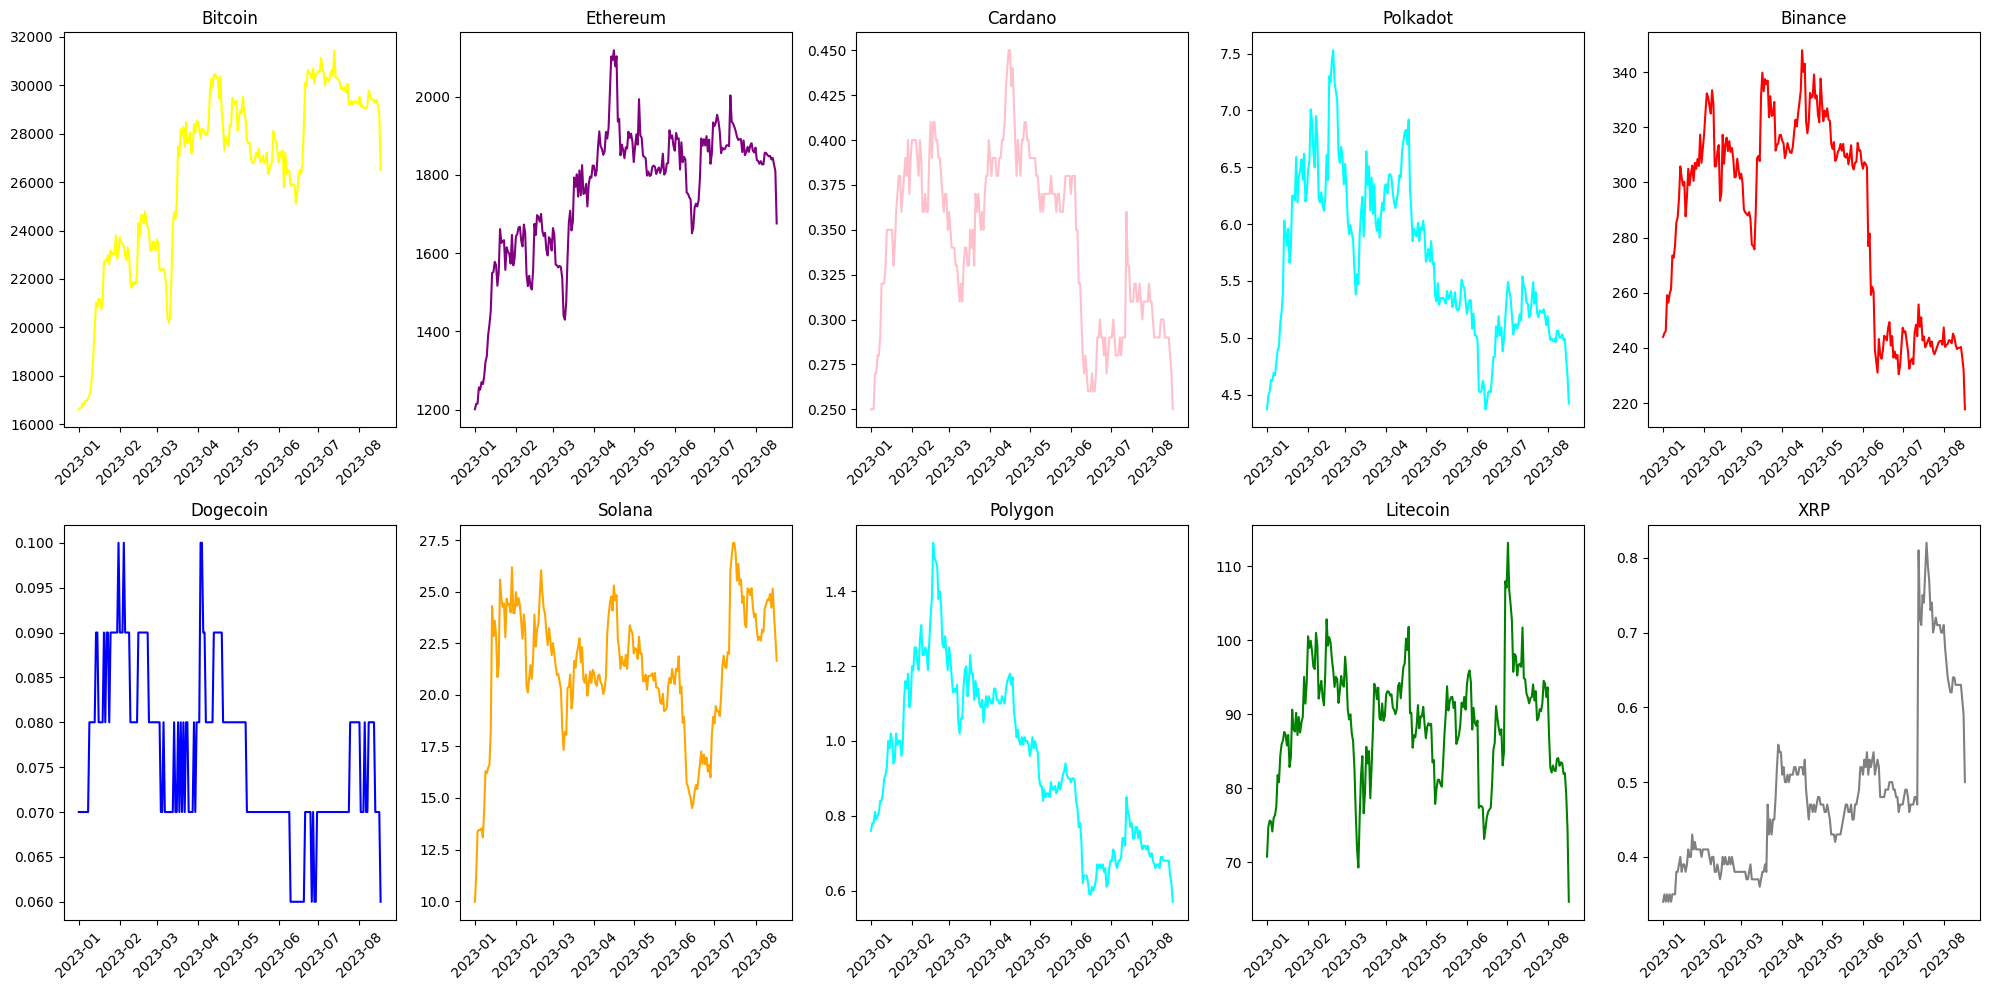

In [44]:
#Gráficando el precio de cada una de las monedas a lo largo del año 2023

plt.figure(figsize=[20,10])

plt.subplot(251)
plt.title('Bitcoin')
plt.plot(df_total['fecha'][df_total['Year']==2023],df_total['prices bitcoin'][df_total['Year']==2023], color='yellow')
plt.xticks(rotation=45)

plt.subplot(252)
plt.title('Ethereum')
plt.plot(df_total['fecha'][df_total['Year']==2023],df_total['prices ethereum'][df_total['Year']==2023], color='purple')
plt.xticks(rotation=45)

plt.subplot(253)
plt.title('Cardano')
plt.plot(df_total['fecha'][df_total['Year']==2023],df_total['prices cardano'][df_total['Year']==2023], color='pink')
plt.xticks(rotation=45)

plt.subplot(254)
plt.title('Polkadot')
plt.plot(df_total['fecha'][df_total['Year']==2023],df_total['prices polkadot'][df_total['Year']==2023],color='cyan')
plt.xticks(rotation=45)


plt.subplot(255)
plt.title('Binance')
plt.plot(df_total['fecha'][df_total['Year']==2023],df_total['prices binancecoin'][df_total['Year']==2023], color='red')
plt.xticks(rotation=45)

plt.subplot(256)
plt.title('Dogecoin')
plt.plot(df_total['fecha'][df_total['Year']==2023],df_total['prices dogecoin'][df_total['Year']==2023], color='blue')
plt.xticks(rotation=45)


plt.subplot(257)
plt.title('Solana')
plt.plot(df_total['fecha'][df_total['Year']==2023],df_total['prices solana'][df_total['Year']==2023], color='orange')
plt.xticks(rotation=45)

plt.subplot(258)
plt.title('Polygon')
plt.plot(df_total['fecha'][df_total['Year']==2023],df_total['prices matic-network'][df_total['Year']==2023], color='cyan')
plt.xticks(rotation=45)

plt.subplot(259)
plt.title('Litecoin')
plt.plot(df_total['fecha'][df_total['Year']==2023],df_total['prices litecoin'][df_total['Year']==2023], color='green')
plt.xticks(rotation=45)

plt.subplot(2,5,10)
plt.title('XRP')
plt.plot(df_total['fecha'][df_total['Year']==2023],df_total['prices ripple'][df_total['Year']==2023], color='gray')
plt.xticks(rotation=45)



plt.tight_layout()
plt.show()

Ya para el año 2023, evidenciamos una mejora en cuanto al comportamiento del precio de las criptomonedas, destacandose por su tendencia alcista bitcoin, ethereum, solana y XRP, mientras que las otras monedas como polygon, binance, cardano polkadot, dogecoin a pesar de haber presentado cambios positivos en cuanto a su tendencia, terminan con una perdida en cuanto al valor del precio y capitalización del mercado.

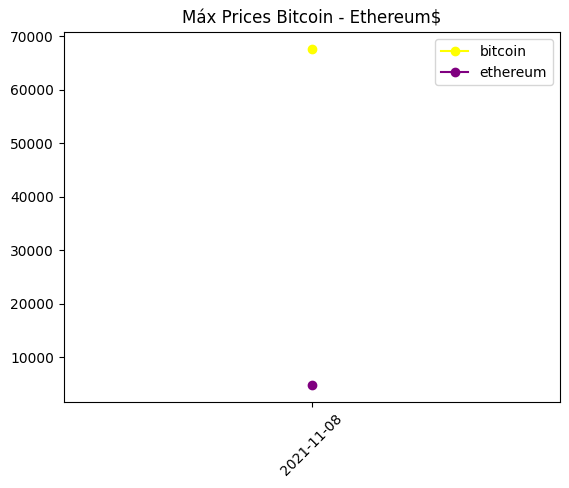

In [29]:
#Gráficando valor máximo precio bitcoin y ethereum

plt.plot(str(df_total['fecha'][df_total['prices bitcoin'].idxmax()]),df_total['prices bitcoin'].max(), marker='o', color='yellow',label='bitcoin')
plt.plot(str(df_total['fecha'][df_total['prices ethereum'].idxmax()]),df_total['prices ethereum'].max(), marker='o', color='purple',label='ethereum')


plt.title('Máx Prices Bitcoin - Ethereum$')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Observamos que para Bitcoin y Ethereum el momento excato en el que se tuvo el precio más alto de cotización de estas monedas, tiene lugar en la misma fecha, siendo el 08 de noviembre de 2021. Por lo que se reafirma aún más la relación entre los movimientos de las mismas.

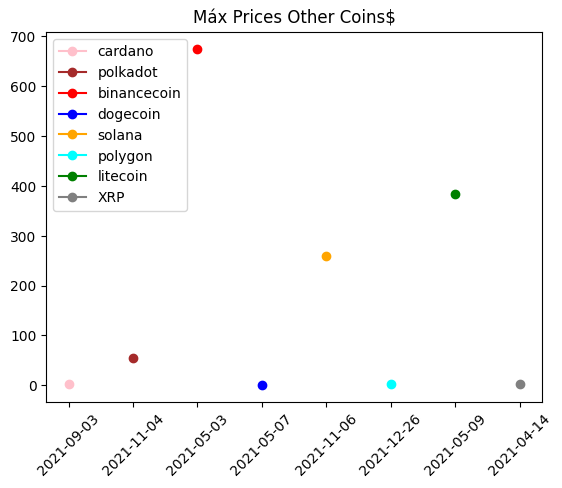

In [28]:
#Gráficando el valor máximo precio de las demás monedas.

plt.plot(str(df_total['fecha'][df_total['prices cardano'].idxmax()]),df_total['prices cardano'].max(), marker='o', color='pink',label='cardano')
plt.plot(str(df_total['fecha'][df_total['prices polkadot'].idxmax()]),df_total['prices polkadot'].max(), marker='o', color='brown',label='polkadot')
plt.plot(str(df_total['fecha'][df_total['prices binancecoin'].idxmax()]),df_total['prices binancecoin'].max(), marker='o', color='red',label='binancecoin')
plt.plot(str(df_total['fecha'][df_total['prices dogecoin'].idxmax()]),df_total['prices dogecoin'].max(), marker='o', color='blue',label='dogecoin')
plt.plot(str(df_total['fecha'][df_total['prices solana'].idxmax()]),df_total['prices solana'].max(), marker='o', color='orange',label='solana')
plt.plot(str(df_total['fecha'][df_total['prices matic-network'].idxmax()]),df_total['prices matic-network'].max(), marker='o', color='cyan',label='polygon')
plt.plot(str(df_total['fecha'][df_total['prices litecoin'].idxmax()]),df_total['prices litecoin'].max(), marker='o', color='green',label='litecoin')
plt.plot(str(df_total['fecha'][df_total['prices ripple'].idxmax()]),df_total['prices ripple'].max(), marker='o', color='gray',label='XRP')


plt.title('Máx Prices Other Coins$')
plt.legend()
plt.xticks(rotation=45)
plt.show()

En el gráfico anterior, se observa que el pico de precio de cad auna de las criptomonedas, tuvo lugar en el año 2021, siendo la más destacada d ellas el precio de binancecoin, cuyo valor de cotización se encuentra por debajo del valor máximo obtenido por parte de bitcoin.

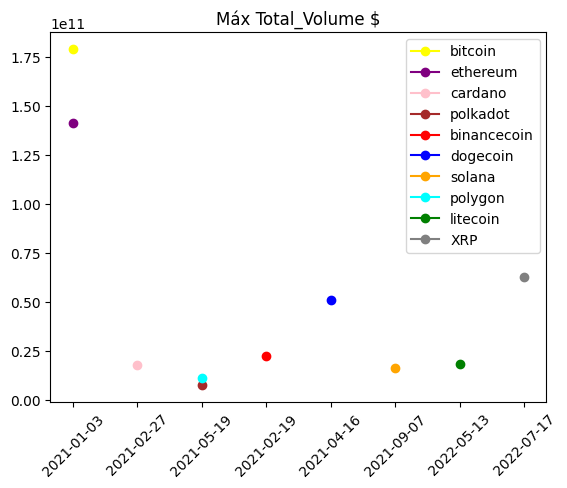

In [27]:
#Gráficando los valores máximos respecto al total de volumen transaccional en unidades monetarias $

plt.plot(str(df_total['fecha'][df_total['total_volumes bitcoin'].idxmax()]),df_total['total_volumes bitcoin'].max(), marker='o', color='yellow',label='bitcoin')
plt.plot(str(df_total['fecha'][df_total['total_volumes ethereum'].idxmax()]),df_total['total_volumes ethereum'].max(), marker='o', color='purple',label='ethereum')
plt.plot(str(df_total['fecha'][df_total['total_volumes cardano'].idxmax()]),df_total['total_volumes cardano'].max(), marker='o', color='pink',label='cardano')
plt.plot(str(df_total['fecha'][df_total['total_volumes polkadot'].idxmax()]),df_total['total_volumes polkadot'].max(), marker='o', color='brown',label='polkadot')
plt.plot(str(df_total['fecha'][df_total['total_volumes binancecoin'].idxmax()]),df_total['total_volumes binancecoin'].max(), marker='o', color='red',label='binancecoin')
plt.plot(str(df_total['fecha'][df_total['total_volumes dogecoin'].idxmax()]),df_total['total_volumes dogecoin'].max(), marker='o', color='blue',label='dogecoin')
plt.plot(str(df_total['fecha'][df_total['total_volumes solana'].idxmax()]),df_total['total_volumes solana'].max(), marker='o', color='orange',label='solana')
plt.plot(str(df_total['fecha'][df_total['total_volumes matic-network'].idxmax()]),df_total['total_volumes matic-network'].max(), marker='o', color='cyan',label='polygon')
plt.plot(str(df_total['fecha'][df_total['total_volumes litecoin'].idxmax()]),df_total['total_volumes litecoin'].max(), marker='o', color='green',label='litecoin')
plt.plot(str(df_total['fecha'][df_total['total_volumes ripple'].idxmax()]),df_total['total_volumes ripple'].max(), marker='o', color='gray',label='XRP')

plt.title('Máx Total_Volume $')
plt.legend()
plt.xticks(rotation=45)
plt.show()


Por su parte, para el total de volumen transaccional de cada una de las criptomonedas seleccionadas para el análisis, la mayoría tiene su pico o punto mas alto en el año 2021, teniendo mayor preponderancia el primer semestre del año, destacandose sobre las demás el valor máximo de bitcoin y ethereum con más del 100% de diferencia respecto de las demás.

<h2 style="color:pink"><center><strong>Conclusiones</strong></h2>

- En conclusión podemos decir que los cambios que sufren las criptomonedas como bitcoin, ethereum, polkadot, cardano, binance, litecoin se encuentran estrechamente ligados, pues los mismos tienen un comportamiento similar historicamente.

- Asimismo, se encuentran criptomonedas como solana y polkadot que presentan un comportamiento historico que difiere de las anterioemente mencionadas.

- A pesar de las fluctuaciones presentadas históricamente, el valor de bitcoin y ethereum sigue siendo el más representativo en contraste con las otras monedas analizadas en el presente proyecto.

- A diferencia de las criptomonedas bitcoin y ethereum, la distribución de los datos de monedas como solana, polkadot, dogecoin, y demás monedas tomads en cuenta para el análisis, presentan outliers lo que implica que se han presentado eventos que han influido en el comportamiento de las mismas, se hace necesario realizar una investigación mas exhaustiva para conocer las causas de estos cambios.

- Se evidencia que existe una correlación positiva entre las variables precio y capitalización del mercado, lo que se corresponde con la formula para el cálculo de las mismas, por su parte para la variable de volumen transaccional, no existe evidencia en cuanto a correlación con alguna de las variables anteriormente mencionadas.

- El comportamiento histórico de las criptomonedas, en el periodo analizado nos permite concluir que se tuvo un tiempo de cosecha en lo que fue el año 2021, pues aquí el total de las monedas analizadas presentaron el valor máximo de cotización del mercado, siendo lideradas por los gigantes como bitcoin y etrhereum.

- Con relación a lo anterior se evidencia un máximo en cuanto a volumen de transacción también para lo que es el año 2021 y 2022, teniendo en cuenta que el precio y capitalización del mercado disminuyo siginificativamenten en este ultimo año, debido a incertidumbre economica y el temor de las personas por invertir en este tipo de activos tan volatiles.


